# Parcial 2 -  Enunciados

Considere las tres series de tiempo que aparecen en cada una de las hojas de excel del archivo __datos_parcial2.xlsx__.

Importe cada una de las tres series de tiempo y para cada una de ellas resuelva lo siguiente en Python:

1. Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

2. Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.

3. Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

4. Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.

5. Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

6. Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.

7. Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

8. Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

En la primera celda del trabajo ubique los nombres de los integrantes del grupo de la siguiente forma:

- __Nombre y cédula del integrante 1 del grupo:__



- __Nombre y cédula del integrante 2 del grupo:__


In [201]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

def printfuller(test_res):
    """ null hypothesis is that a unit root is present in a time series sample."""
    print("Prueba de Dickey Fuller")
    print(f"The test statistic: \t {round(test_res[0], 10)}")
    print(f"p-value: \t \t {test_res[1]}")

plt.style.use('fivethirtyeight')

### Base de Datos:

In [202]:
s1 = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name="serie1", parse_dates=["fecha"])
s2 = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name="datos2", parse_dates=["date"])
s3 = pd.read_excel("Data/datos_parcial2.xlsx", sheet_name="tercera", parse_dates=["dia"])

### <center> Serie de tiempo 1

### Breve exploración de la DB:

In [155]:
s1.shape

(231, 2)

In [156]:
s1.dtypes

fecha    datetime64[ns]
valor           float64
dtype: object

In [157]:
s1.head()

,fecha,valor
0,2021-01-01,0.06
1,2021-01-02,0.05
2,2021-01-03,0.05
3,2021-01-04,0.51
4,2021-01-05,2.03


In [158]:
s1.tail()

,fecha,valor
226,2021-08-15,16.90
227,2021-08-16,17.35
228,2021-08-17,18.85
229,2021-08-18,21.40
230,2021-08-19,22.60


In [159]:
s1.set_index("fecha", inplace=True)
s1

,valor
fecha,
2021-01-01,0.06
2021-01-02,0.05
2021-01-03,0.05
2021-01-04,0.51
2021-01-05,2.03
...,...
2021-08-15,16.90
2021-08-16,17.35
2021-08-17,18.85


1. Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

/tmp/ipykernel_12473/4086873171.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


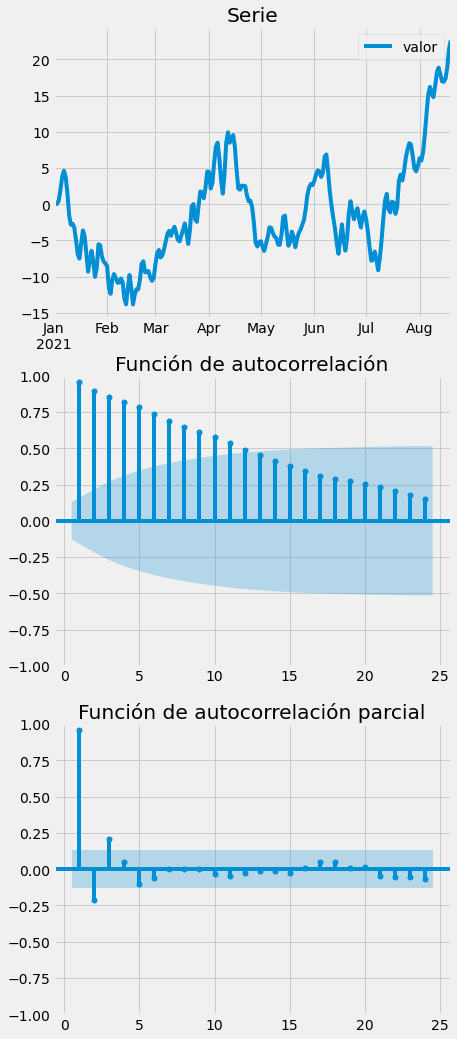

In [160]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
s1.plot(ax=ax[0], title = "Serie", xlabel="")
plot_acf(s1, zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(s1, method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

2. Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.


In [161]:
test = adfuller(s1)
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -0.6940413117
p-value: 	 	 0.8482869409753928


3. Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

In [162]:
s1_aux_dif = s1.diff()
s1_aux_dif

,valor
fecha,
2021-01-01,NaN
2021-01-02,-0.01
2021-01-03,0.00
2021-01-04,0.46
2021-01-05,1.52
...,...
2021-08-15,-0.06
2021-08-16,0.45
2021-08-17,1.50


/tmp/ipykernel_12473/1971072672.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


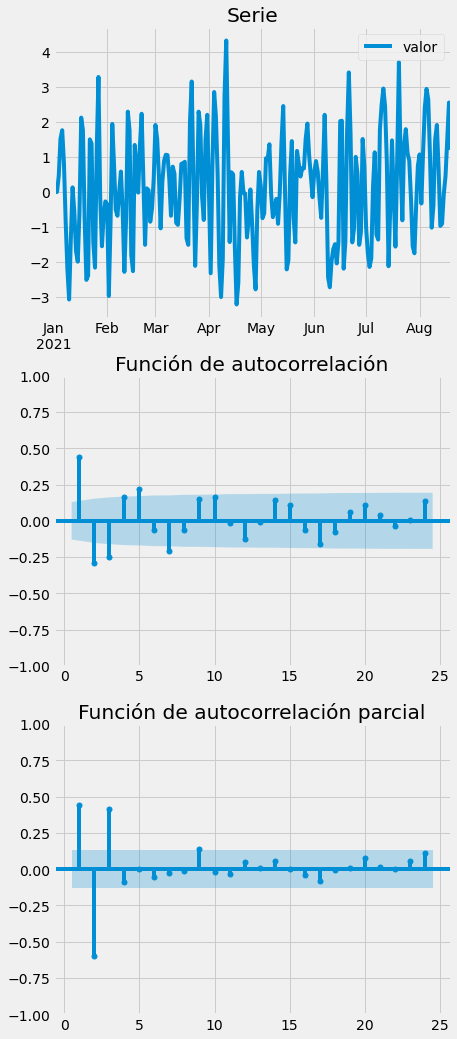

In [163]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
s1_aux_dif.plot(ax=ax[0], title = "Serie", xlabel="")
plot_acf(s1_aux_dif.dropna(), zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(s1_aux_dif.dropna(), method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()



In [164]:
test = adfuller(s1_aux_dif.dropna())
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -6.9049727761
p-value: 	 	 1.2540124522199944e-09


4. Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.


In [165]:
model1 = ARIMA(s1.valor, order=(0, 1, 5)).fit()
model2 = ARIMA(s1.valor, order=(3, 1, 5)).fit()
model3 = ARIMA(s1.valor, order=(3, 1, 0)).fit()

/home/sr/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/sr/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/sr/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/sr/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/sr/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D w

In [166]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(0, 1, 5)   Log Likelihood                -327.427
Date:                Mon, 03 Oct 2022   AIC                            666.854
Time:                        18:10:09   BIC                            687.482
Sample:                    01-01-2021   HQIC                           675.175
                         - 08-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9694      0.068     14.169      0.000       0.835       1.104
ma.L2          0.0230      0.092      0.250      0.803      -0.158       0.204
ma.L3         -0.4066      0.086     -4.732      0.000      -0.575      -0.238
ma.L4         -0.0947      0.090     -1.051      0.293      -0.271       0.082
ma.L5          0.1446      0.065      2.225      0.026       0.017       0.272
sigma2         1.0024      0.105      9.566      0.000       0.797       1.208
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 2.07
Prob(Q):                              0.73   Prob(JB):                         0.36
Heteroskedasticity (H):               1.17   Skew:                             0.14
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [167]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(3, 1, 5)   Log Likelihood                -322.878
Date:                Mon, 03 Oct 2022   AIC                            663.757
Time:                        18:10:11   BIC                            694.700
Sample:                    01-01-2021   HQIC                           676.239
                         - 08-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0208      0.701      0.030      0.976      -1.353       1.395
ar.L2         -0.5338      0.223     -2.390      0.017      -0.972      -0.096
ar.L3         -0.2630      0.519     -0.506      0.613      -1.281       0.755
ma.L1          0.9757      0.697      1.401      0.161      -0.390       2.341
ma.L2          0.5481      0.532      1.031      0.303      -0.494       1.590
ma.L3          0.4011      0.371      1.082      0.279      -0.326       1.128
ma.L4          0.2919      0.246      1.185      0.236      -0.191       0.775
ma.L5          0.1508      0.103      1.464      0.143      -0.051       0.353
sigma2         0.9628      0.100      9.586      0.000       0.766       1.160
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.95   Prob(JB):                         0.52
Heteroskedasticity (H):               1.18   Skew:                             0.10
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -324.862
Date:                Mon, 03 Oct 2022   AIC                            657.723
Time:                        18:10:12   BIC                            671.475
Sample:                    01-01-2021   HQIC                           663.270
                         - 08-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9507      0.059     16.213      0.000       0.836       1.066
ar.L2         -0.8858      0.065    -13.691      0.000      -1.013      -0.759
ar.L3          0.4167      0.060      6.920      0.000       0.299       0.535
sigma2         0.9800      0.103      9.481      0.000       0.777       1.183
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.56   Prob(JB):                         0.45
Heteroskedasticity (H):               1.21   Skew:                             0.07
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [169]:
print("AIC")
print(model1.aic, model2.aic, model3.aic)
print("BIC")
print(model1.bic, model2.bic, model3.bic)

AIC
666.8536978819373 663.7568628139754 657.7230431825426
BIC
687.4821737354764 694.6995765942842 671.4753604182354


In [170]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  valor   No. Observations:                  231
Model:                 ARIMA(3, 1, 5)   Log Likelihood                -322.878
Date:                Mon, 03 Oct 2022   AIC                            663.757
Time:                        18:10:14   BIC                            694.700
Sample:                    01-01-2021   HQIC                           676.239
                         - 08-19-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0208      0.701      0.030      0.976      -1.353       1.395
ar.L2         -0.5338      0.223     -2.390      0.017      -0.972      -0.096
ar.L3         -0.2630      0.519     -0.506      0.613      -1.281       0.755
ma.L1          0.9757      0.697      1.401      0.161      -0.390       2.341
ma.L2          0.5481      0.532      1.031      0.303      -0.494       1.590
ma.L3          0.4011      0.371      1.082      0.279      -0.326       1.128
ma.L4          0.2919      0.246      1.185      0.236      -0.191       0.775
ma.L5          0.1508      0.103      1.464      0.143      -0.051       0.353
sigma2         0.9628      0.100      9.586      0.000       0.766       1.160
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.31
Prob(Q):                              0.95   Prob(JB):                         0.52
Heteroskedasticity (H):               1.18   Skew:                             0.10
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

5. Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

In [171]:
model2.arroots

array([ 0.29299596-1.16958137j,  0.29299596+1.16958137j,
       -2.61559112-0.j        ])

6. Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.


In [172]:
sm.stats.acorr_ljungbox(model2.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,0.002980,0.956467
2,0.111333,0.945855
3,0.152233,0.984905
4,0.287751,0.990591
5,0.566897,0.989469
6,0.967480,0.986815
7,1.109452,0.992865
8,1.133216,0.997259
9,1.360112,0.998058
10,3.597811,0.963672


7. Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

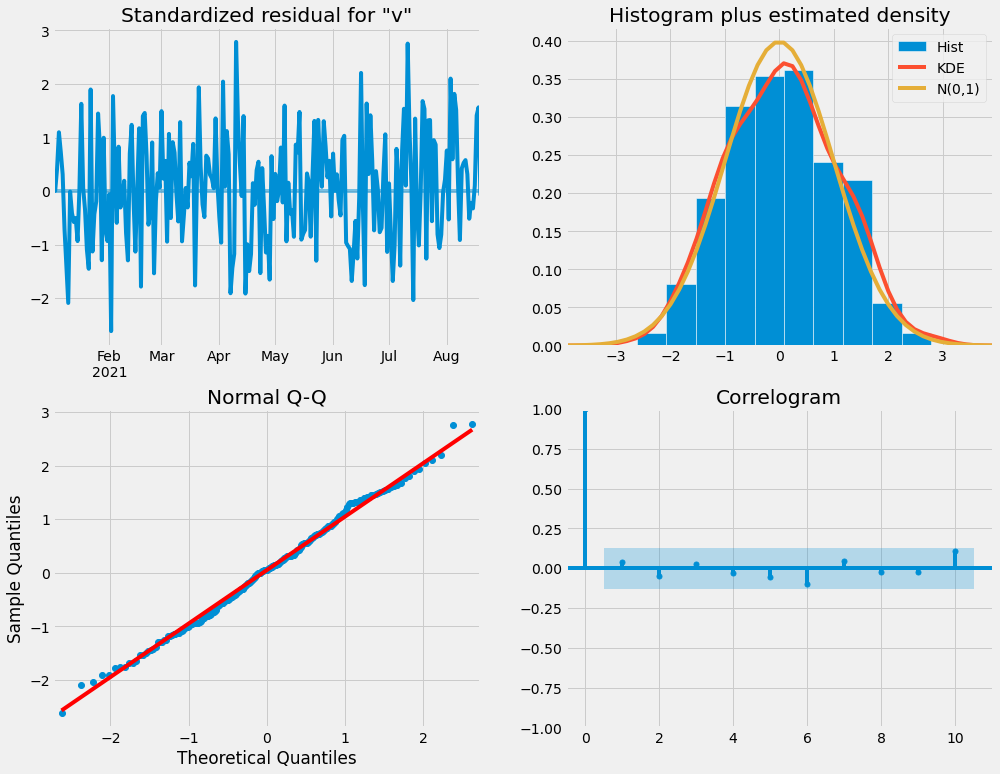

In [173]:
model3.plot_diagnostics(figsize=(15,12))
plt.show()

8. Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [174]:
fore = model3.get_forecast(5)
fore_ci = fore.conf_int()
fore_ci

,lower valor,upper valor
2021-08-20,20.166778,24.047314
2021-08-21,17.384726,25.891271
2021-08-22,16.411976,27.845631
2021-08-23,16.336441,29.274568
2021-08-24,15.682681,29.954566


In [175]:
fore.predicted_mean

2021-08-20    22.107046
2021-08-21    21.637998
2021-08-22    22.128804
2021-08-23    22.805504
2021-08-24    22.818624
Freq: D, Name: predicted_mean, dtype: float64

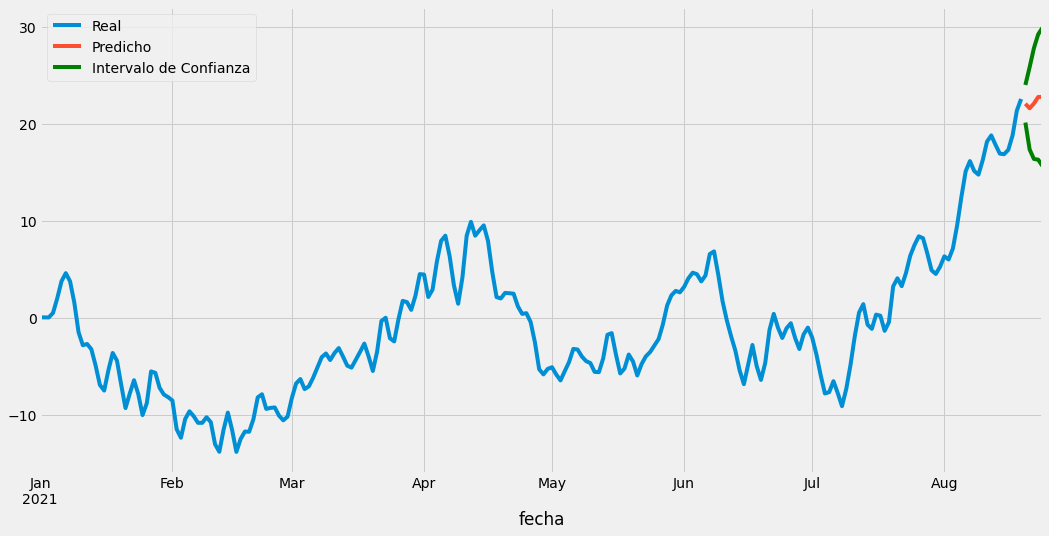

In [176]:
plt.figure(figsize=(16,8))  #  Graficamos:
s1.valor.plot()
fore.predicted_mean.plot()
fore_ci.iloc[:,0].plot(color="green")
fore_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])

### <center> Serie de tiempo 3

### Breve exploración de la DB:

In [203]:
s3.shape

(837, 2)

In [204]:
s3.dtypes

dia         datetime64[ns]
registro           float64
dtype: object

In [205]:
s3.head()

,dia,registro
0,2020-03-07,-54.21
1,2019-07-24,26.12
2,2020-07-10,-16.74
3,2019-06-19,-1.54
4,2019-04-01,-1.67


In [207]:
s3.tail()

,dia,registro
832,2019-02-17,0.35
833,2019-04-17,-13.90
834,2021-04-14,-52.95
835,2019-03-25,-12.94
836,2019-08-19,42.46


In [208]:
s3.set_index("dia", inplace=True)
s3

,registro
dia,
2020-03-07,-54.21
2019-07-24,26.12
2020-07-10,-16.74
2019-06-19,-1.54
2019-04-01,-1.67
...,...
2019-02-17,0.35
2019-04-17,-13.90
2021-04-14,-52.95


In [209]:
s3.sort_values(by='dia', inplace = True)
s3

,registro
dia,
2019-01-01,1.37
2019-01-02,3.65
2019-01-03,5.86
2019-01-04,10.57
2019-01-05,14.17
...,...
2021-04-12,-59.77
2021-04-13,-56.04
2021-04-14,-52.95


1. Realice los gráficos ACF y PACF para tratar de identificar los órdenes $p$, $d$ y $q$ del modelo ARIMA($p$, $d$, $q$). Saque conclusiones argumentando cada una.

/tmp/ipykernel_12473/1992979705.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


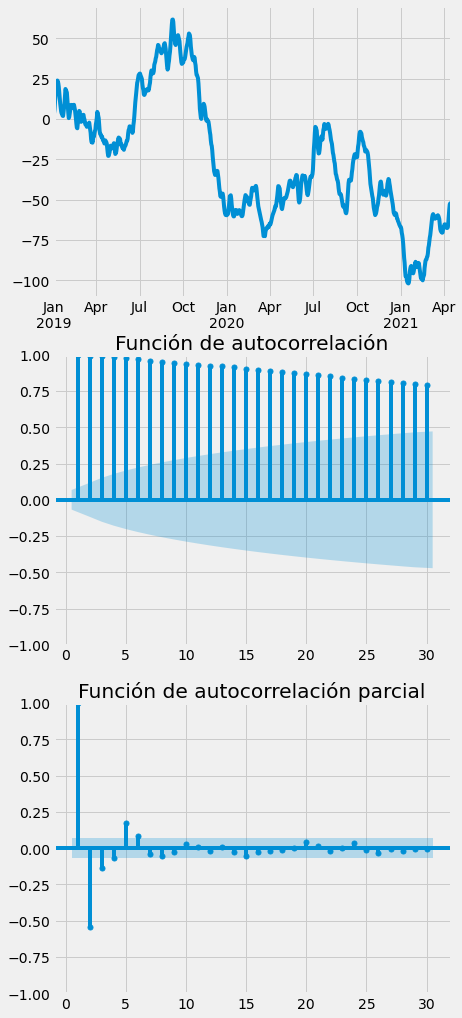

In [210]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
s3.registro.plot(ax=ax[0], xlabel = "")
plot_acf(s3.registro, zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(s3.registro, method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

2. Aplique la prueba de Dickey-Fuller para ver si es necesario tomar diferencias (valor de $d$). Saque conclusiones argumentando cada una.


In [211]:
test = adfuller(s3.dropna())
printfuller(test)

Prueba de Dickey Fuller
The test statistic: 	 -1.5245498355
p-value: 	 	 0.521333827352627


3. Si $d\geq 1$ en el item (2), entonces realice nuevamente los gráficos ACF y PACF de la serie diferenciada de orden $d$, esto con el fin de identificar los ordenes $p$ y $q$. Saque conclusiones argumentando cada una.

In [212]:
s3_aux_dif = s3.diff()
s3_aux_dif

,registro
dia,
2019-01-01,NaN
2019-01-02,2.28
2019-01-03,2.21
2019-01-04,4.71
2019-01-05,3.60
...,...
2021-04-12,4.27
2021-04-13,3.73
2021-04-14,3.09


/tmp/ipykernel_12473/1742726648.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


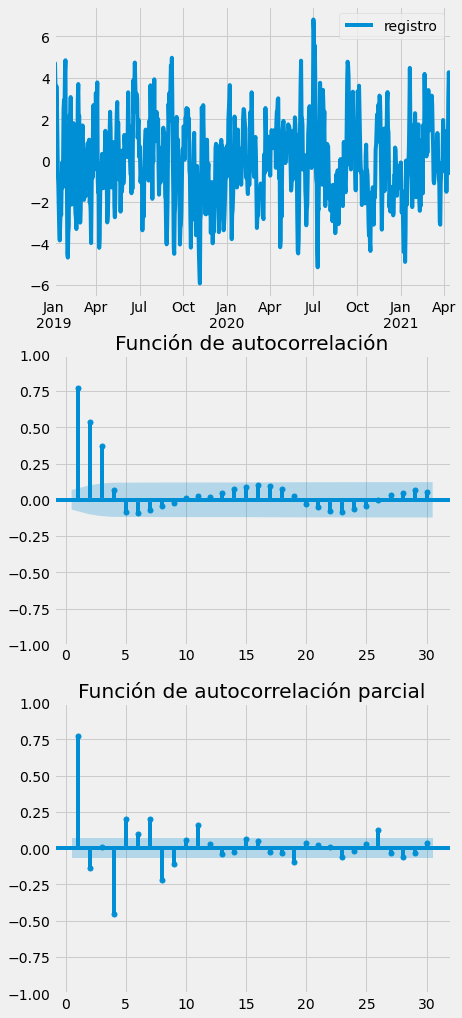

In [213]:
fig, ax = plt.subplots(3,1,figsize=(7,15))
fig.tight_layout(pad=2.5)
s3_aux_dif.plot(ax=ax[0], xlabel = "")
plot_acf(s3_aux_dif.dropna(), zero = False, title = "Función de autocorrelación", ax=ax[1])
plot_pacf(s3_aux_dif.dropna(), method="ywm", zero = False, title = "Función de autocorrelación parcial", ax=ax[2])
fig.show()

4. Aplique varios modelos (explicando el por qué aplica cada uno) y use un criterio de selección (AIC, BIC) para seleccionar el "mejor". Saque conclusiones argumentando cada una.m

In [214]:
model1 = ARIMA(s3.registro, order=(11, 1, 0)).fit()
model2 = ARIMA(s3.registro, order=(0, 1, 2)).fit()
model3 = ARIMA(s3.registro, order=(25, 1, 0)).fit()

/home/sr/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/sr/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/sr/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/sr/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/sr/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D w

In [215]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               registro   No. Observations:                  837
Model:                ARIMA(11, 1, 0)   Log Likelihood               -1198.822
Date:                Mon, 03 Oct 2022   AIC                           2421.645
Time:                        18:19:07   BIC                           2478.388
Sample:                    01-01-2019   HQIC                          2443.398
                         - 04-16-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9546      0.037     25.546      0.000       0.881       1.028
ar.L2         -0.1966      0.050     -3.898      0.000      -0.295      -0.098
ar.L3          0.5530      0.046     11.923      0.000       0.462       0.644
ar.L4         -0.8828      0.051    -17.178      0.000      -0.983      -0.782
ar.L5          0.1821      0.060      3.044      0.002       0.065       0.299
ar.L6         -0.0767      0.059     -1.294      0.196      -0.193       0.039
ar.L7          0.4974      0.058      8.634      0.000       0.384       0.610
ar.L8         -0.1951      0.051     -3.823      0.000      -0.295      -0.095
ar.L9         -0.1283      0.048     -2.683      0.007      -0.222      -0.035
ar.L10        -0.1093      0.048     -2.262      0.024      -0.204      -0.015
ar.L11         0.1710      0.034      5.033      0.000       0.104       0.238
sigma2         1.0264      0.047     21.741      0.000       0.934       1.119
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 7.03
Prob(Q):                              0.86   Prob(JB):                         0.03
Heteroskedasticity (H):               0.88   Skew:                             0.14
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [216]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               registro   No. Observations:                  837
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1396.946
Date:                Mon, 03 Oct 2022   AIC                           2799.892
Time:                        18:19:08   BIC                           2814.078
Sample:                    01-01-2019   HQIC                          2805.331
                         - 04-16-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0367      0.035     29.894      0.000       0.969       1.105
ma.L2          0.2106      0.035      5.954      0.000       0.141       0.280
sigma2         1.6527      0.083     19.979      0.000       1.491       1.815
===================================================================================
Ljung-Box (L1) (Q):                   3.25   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.07   Prob(JB):                         0.64
Heteroskedasticity (H):               0.85   Skew:                             0.07
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [217]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               registro   No. Observations:                  837
Model:                ARIMA(25, 1, 0)   Log Likelihood               -1184.885
Date:                Mon, 03 Oct 2022   AIC                           2421.769
Time:                        18:19:11   BIC                           2544.714
Sample:                    01-01-2019   HQIC                          2468.901
                         - 04-16-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9466      0.038     24.627      0.000       0.871       1.022
ar.L2         -0.1651      0.051     -3.231      0.001      -0.265      -0.065
ar.L3          0.5548      0.048     11.607      0.000       0.461       0.648
ar.L4         -0.9130      0.054    -17.040      0.000      -1.018      -0.808
ar.L5          0.1317      0.066      2.010      0.044       0.003       0.260
ar.L6         -0.0189      0.064     -0.294      0.768      -0.145       0.107
ar.L7          0.5539      0.063      8.862      0.000       0.431       0.676
ar.L8         -0.1763      0.065     -2.704      0.007      -0.304      -0.049
ar.L9         -0.2620      0.064     -4.086      0.000      -0.388      -0.136
ar.L10        -0.1355      0.065     -2.095      0.036      -0.262      -0.009
ar.L11         0.2304      0.065      3.558      0.000       0.103       0.357
ar.L12         0.1751      0.067      2.610      0.009       0.044       0.307
ar.L13        -0.0829      0.064     -1.304      0.192      -0.208       0.042
ar.L14        -0.1395      0.065     -2.132      0.033      -0.268      -0.011
ar.L15        -0.0732      0.070     -1.053      0.292      -0.210       0.063
ar.L16         0.2035      0.071      2.877      0.004       0.065       0.342
ar.L17         0.0178      0.069      0.259      0.796      -0.117       0.153
ar.L18         0.0361      0.067      0.541      0.588      -0.095       0.167
ar.L19        -0.1976      0.071     -2.768      0.006      -0.337      -0.058
ar.L20         0.0306      0.069      0.442      0.658      -0.105       0.166
ar.L21         0.0597      0.067      0.889      0.374      -0.072       0.191
ar.L22         0.0502      0.059      0.854      0.393      -0.065       0.166
ar.L23        -0.0490      0.050     -0.987      0.324      -0.146       0.048
ar.L24        -0.0521      0.052     -1.001      0.317      -0.154       0.050
ar.L25         0.0361      0.038      0.947      0.344      -0.039       0.111
sigma2         0.9920      0.046     21.487      0.000       0.901       1.082
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 9.50
Prob(Q):                              0.88   Prob(JB):                         0.01
Heteroskedasticity (H):               0.89   Skew:                             0.16
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [218]:
print("AIC")
print(model1.aic, model2.aic, model3.aic)
print("BIC")
print(model1.bic, model2.bic, model3.bic)

AIC
2421.6448745175594 2799.8924805609113 2421.769300314767
BIC
2478.3884178745757 2814.0783664001656 2544.713644254969


5. Verifique si el "mejor" modelo seleccionado en el item (4) es estacionario e invertible (recuerde usar las funciones __abs__ y __np.roots__ aplicadas a los polinómios estimados por el modelo). Saque conclusiones argumentando cada una.

6. Verifique si existe autocorrelación en los residuales del modelo seleccionado utilizando el gráfico ACF y complementando con la prueba de Ljung-Box (para los primeros 10 lags, es decir, h=10). Saque conclusiones argumentando cada una.


In [219]:
sm.stats.acorr_ljungbox(model2.resid, lags=10, return_df=True)

,lb_stat,lb_pvalue
1,3.594142,5.798357e-02
2,88.331407,6.592932e-20
3,157.601303,6.036173e-34
4,164.727927,1.415023e-34
5,166.080236,5.003245e-34
6,167.013552,1.933223e-33
7,170.697222,1.789539e-33
8,171.072861,7.684598e-33
9,173.007875,1.457205e-32
10,173.573645,5.044420e-32


7. Verifique si hay normalidad en los residuales del modelo. Saque conclusiones argumentando cada una.

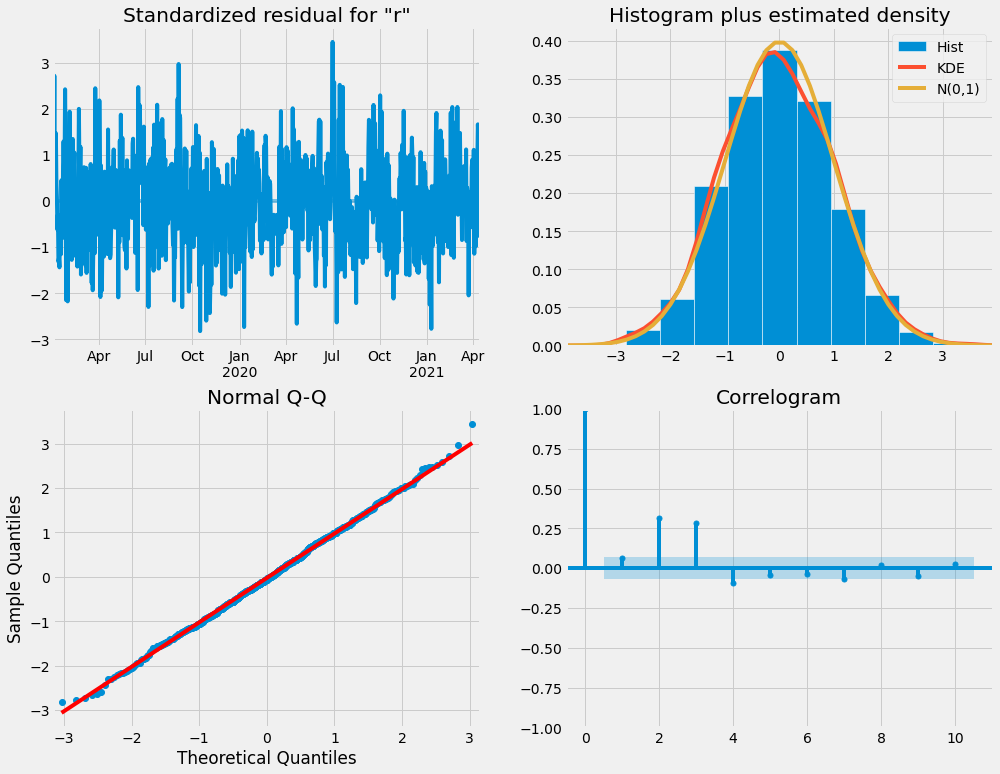

In [220]:
model2.plot_diagnostics(figsize=(15,12))
plt.show()

8. Si todo lo anterior se cumple entonces puede realizar pronósticos con el "mejor" modelo ajustado para los 5 valores futuros. Saque conclusiones argumentando cada una.

In [221]:
fore = model2.get_forecast(5)
fore_ci = fore.conf_int()
fore_ci

,lower registro,upper registro
2021-04-17,-55.680112,-50.640771
2021-04-18,-58.863824,-47.429793
2021-04-19,-61.193463,-45.100155
2021-04-20,-62.986169,-43.307448
2021-04-21,-64.499227,-41.794391


In [222]:
fore.predicted_mean

2021-04-17   -53.160441
2021-04-18   -53.146809
2021-04-19   -53.146809
2021-04-20   -53.146809
2021-04-21   -53.146809
Freq: D, Name: predicted_mean, dtype: float64

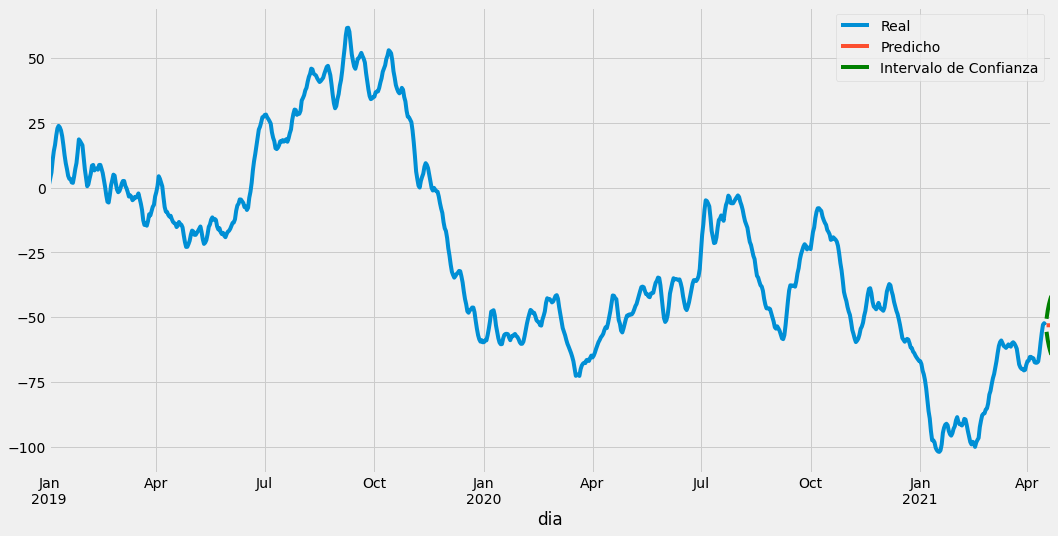

In [223]:
plt.figure(figsize=(16,8))  #  Graficamos:
s3.registro.plot()
fore.predicted_mean.plot()
fore_ci.iloc[:,0].plot(color="green")
fore_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])

In [230]:
pred = model2.get_prediction(start="2021-04-16", end="2021-04-21", dynamic=False)
pred_ci = pred.conf_int(alpha=0.05) # Intervalo de confianza 
pred_ci

,lower registro,upper registro
2021-04-16,-55.604392,-50.565051
2021-04-17,-55.680112,-50.640771
2021-04-18,-58.863824,-47.429793
2021-04-19,-61.193463,-45.100155
2021-04-20,-62.986169,-43.307448
2021-04-21,-64.499227,-41.794391


In [231]:
pred.predicted_mean

2021-04-16   -53.084722
2021-04-17   -53.160441
2021-04-18   -53.146809
2021-04-19   -53.146809
2021-04-20   -53.146809
2021-04-21   -53.146809
Freq: D, Name: predicted_mean, dtype: float64

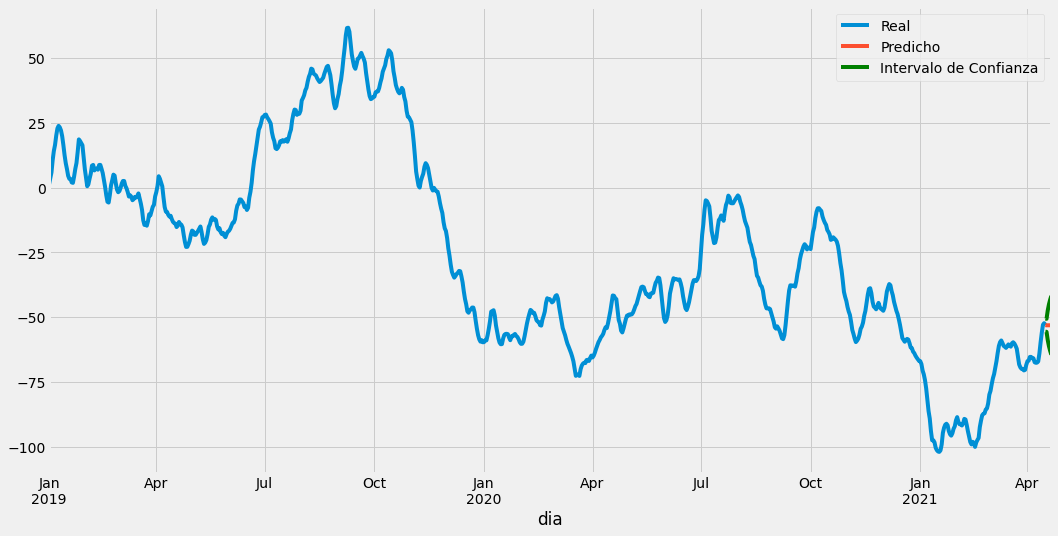

In [232]:
plt.figure(figsize=(16,8))  #  Graficamos:
s3.registro.plot()
pred.predicted_mean.plot()
pred_ci.iloc[:,0].plot(color="green")
pred_ci.iloc[:,1].plot(color="green")
plt.legend(["Real", "Predicho", "Intervalo de Confianza"])